## Sub-task 3

### Import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis

import warnings
warnings.filterwarnings("ignore")

### Get the dataset and EDA

In [2]:
df = pd.read_csv('kc_house_data_reduced.csv')
df.head()

,price,condition,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,7,1180,0,1340
1,538000.0,3,7,2170,400,1690
2,180000.0,3,6,770,0,2720
3,604000.0,5,7,1050,910,1360
4,510000.0,3,8,1680,0,1800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   condition      21613 non-null  int64  
 2   grade          21613 non-null  int64  
 3   sqft_above     21613 non-null  int64  
 4   sqft_basement  21613 non-null  int64  
 5   sqft_living15  21613 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1013.2 KB


In [4]:
df.describe()

,price,condition,grade,sqft_above,sqft_basement,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.409430,7.656873,1788.390691,291.509045,1986.552492
std,3.673622e+05,0.650743,1.175459,828.090978,442.575043,685.391304
min,7.500000e+04,1.000000,1.000000,290.000000,0.000000,399.000000
25%,3.219500e+05,3.000000,7.000000,1190.000000,0.000000,1490.000000
50%,4.500000e+05,3.000000,7.000000,1560.000000,0.000000,1840.000000
75%,6.450000e+05,4.000000,8.000000,2210.000000,560.000000,2360.000000
max,7.700000e+06,5.000000,13.000000,9410.000000,4820.000000,6210.000000


In [5]:
## check for null values
df.isnull().sum()

price            0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
dtype: int64

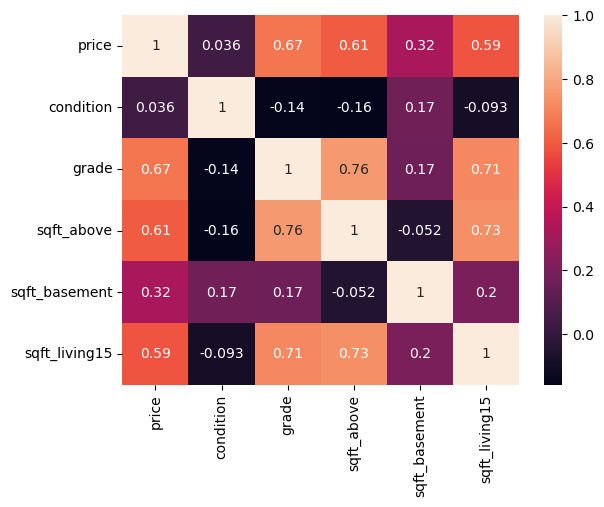

In [9]:
# checking the relationship between features
sns.heatmap(df.corr(), annot=True);

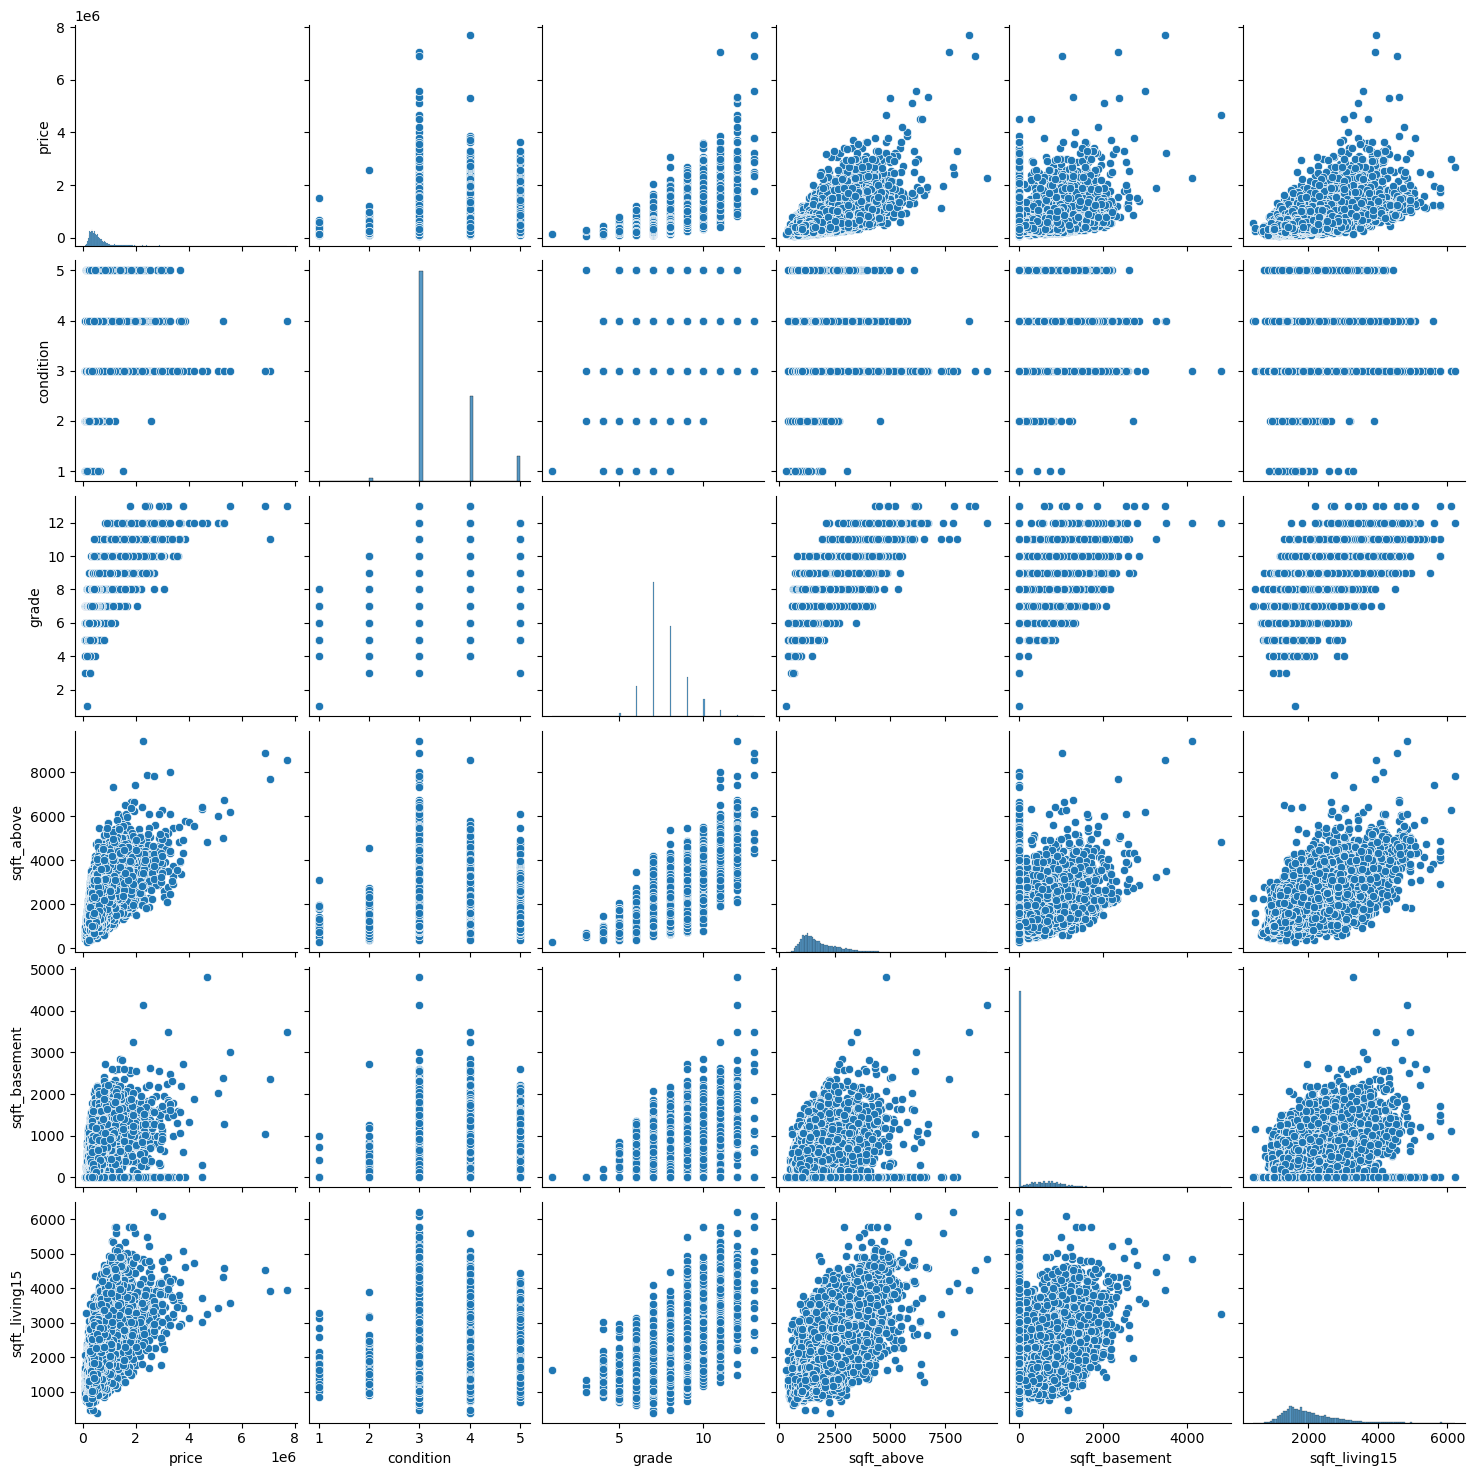

In [10]:
sns.pairplot(df);

### Model training

In [11]:
X = df.drop('price', axis=1)
y = df['price']

X.head()

,condition,grade,sqft_above,sqft_basement,sqft_living15
0,3,7,1180,0,1340
1,3,7,2170,400,1690
2,3,6,770,0,2720
3,5,7,1050,910,1360
4,3,8,1680,0,1800


In [12]:
fac = FactorAnalysis(n_components=2)
X_fa = fac.fit_transform(X)

**Notes:** The components variable will contain the loadings of each feature on each factor. Interpreting these loadings involves understanding how much each feature contributes to each factor. Positive and negative loadings indicate the direction and strength of the relationship.



In [13]:
print(fac.components_)

[[-4.48624580e-02  9.65322474e-01  6.48830918e+02  1.96716360e+02
   5.58405490e+02]
 [ 1.57787049e-01 -2.77271295e-01 -3.95732030e+02  3.70346887e+02
  -1.32457091e+02]]


In [14]:
X_fa

array([[-0.92980142, -0.22989146],
       [ 0.04519514,  0.12533616],
       [-0.89168268, -0.13266876],
       ...,
       [-1.12312821, -0.13829599],
       [-0.46338662, -0.47208073],
       [-1.12312821, -0.13829599]])

Loadings close to -1 or 1 indicate that the factor strongly influences the variable. Loadings close to 0 indicate that the factor has a weak influence on the variable.

If the components are easily interpretable, you might observe that certain variables have high loadings on one component and low loadings on the other. For example, if you were analyzing car data, one component might have high loadings on variables related to engine performance, while the other might have high loadings on variables related to fuel efficiency.

If the components are not easily interpretable, it could be due to several reasons (e.g., correlated factors, inadequate sample size, non-normal data). In such cases, you may need to explore alternative factor analysis techniques, preprocess your data differently, or reconsider the number of components